### Mean Data Pixel Calculation

It helps us identify variation or movement in hand gesture data to train model on images positioned all around the frame.
- Like varying separation between the finger.
- Angle in which hand is held
<br/>
and more...

Total images 301


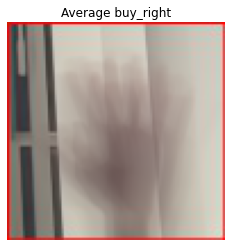

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from pprint import pprint
%matplotlib inline

train_dir = 'GESTURE DATASET/test' # image folder
GESTURE_NAME = 'buy_right'

# get the list of jpegs from sub image class folders
normal_imgs = [fn for fn in os.listdir(f'{train_dir}/{GESTURE_NAME}') if fn.endswith('.jpg')]

# randomly select 3 of each
select_norm = np.random.choice(normal_imgs, 3, replace = False)

# also check the number of files here
print('Total images', len(normal_imgs))

# making n X m matrix
def img2np(path, list_of_filename, size = (96, 96, 3)):
    # iterating through each file
    full_mat = []
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'rgb'
                                       )
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        full_mat.append(img_ts)
    return full_mat

# run it on our folders
images_array = img2np(f'{train_dir}/{GESTURE_NAME}/', normal_imgs)
  
def find_mean_img_v2(full_mat):
  final = np.zeros(shape=(96, 96, 3))
  for i in range(96):
    for j in range(96):
      for img_no in range(len(normal_imgs)):
        for rgb_pos in range(3):
          final[i][j][rgb_pos] += full_mat[img_no][i][j][rgb_pos]/255
      final[i][j][0] /= len(normal_imgs)
      final[i][j][1] /= len(normal_imgs)
      final[i][j][2] /= len(normal_imgs)
  return final
  
  

mean_image = find_mean_img_v2(images_array)
plt.imshow(mean_image, vmin=0, vmax=255)
plt.title(f'Average {GESTURE_NAME}')
plt.axis('off')
plt.show()
